We're going to work with a [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). Download it using the cell below:

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = load_diabetes()
feature_name = dataset.feature_names
feature_data = dataset.data
target_data = dataset.target
print(dataset)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [ ]:
print("Feature names:",feature_name)
print("Feature data shape:",feature_data.shape)
print("Feature data type:",type(feature_data[0,0]))
print("Number of samples:",feature_data.shape[0])
print("Number of features:",feature_data.shape[1])
print("Number of target value:",target_data.shape[0])
print("Median target value:",np.median(target_data))
print("Target value greater than the median target value:",np.sum(target_data > np.median(target_data)))

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Feature data shape: (442, 10)
Feature data type: <class 'numpy.float64'>
Number of samples: 442
Number of features: 10
Number of target value: 442
Median target value: 140.5
Target value greater than the median target value: 221


## Part 1: Getting started
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this.

Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as "diabetes severity below median" or "diabetes severity above median".

In [ ]:
df = pd.DataFrame.from_records(data = feature_data,columns = feature_name)
df_target = pd.DataFrame({'target': target_data})
df['target'] = df_target
newTarget = target_data > np.median(target_data)
df_newTarget = pd.DataFrame({'new target': newTarget.astype(int)})
df['new target'] = df_newTarget
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  new target  
0   -0.002592  0.01

### Splitting the data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, newTarget.astype(int), test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``age``, the y-axis is ``bmi,`` and the color of each datapoint indicates its class.




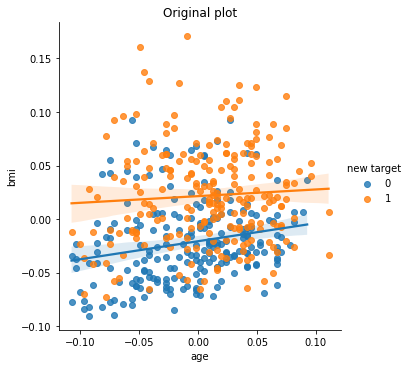

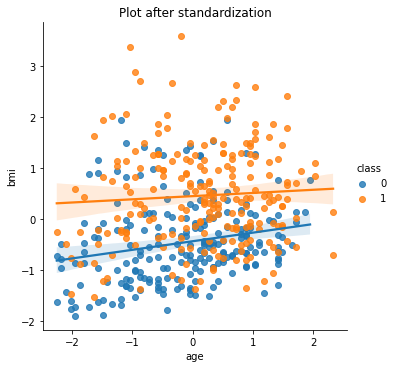

In [ ]:
import seaborn as sns
sns.lmplot(data=df, x="age", y="bmi", hue="new target").set(title='Original plot')

ageData = df.age
agemu,agesi = ageData.mean(), ageData.std()

bmiData = df.bmi
bmimu,bmisi = bmiData.mean(), bmiData.std()

classData = newTarget.astype(int)

ageData -= agemu #Subtract the mean from every entry
ageData /= agesi #Divide every entry by the standard deviation
bmiData -= bmimu #Subtract the mean from every entry
bmiData /= bmisi #Divide every entry by the standard deviation

standardized = pd.DataFrame({'age': ageData,'bmi': bmiData,'class': classData})
sns.lmplot(data=standardized, x="age", y="bmi", hue="class").set(title='Plot after standardization')

## Part 2: KNN Classifier without Standardization
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a diabetes severity that is less than the median or greater than the median.





The best cross-validation accuracy: 0.7542570068746695
The best k: 15


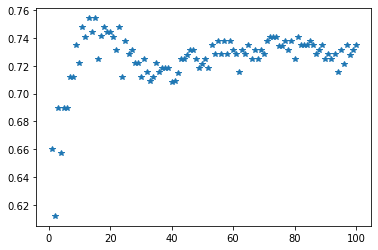

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn import neighbors
import matplotlib.pyplot as plt

k = list(range(1,101))
allAccuracy = np.array([])
allAccuracyT = np.array([])
for i in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors = i)
  scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
  allAccuracy = np.append(allAccuracy,scores['test_score'].mean())
  allAccuracyT = np.append(allAccuracyT,scores['train_score'].mean())
plt.plot(k, allAccuracy, '*')
bestAccuracy = np.max(allAccuracy)
bestIndex = np.argwhere(allAccuracy == bestAccuracy)
bestIndex = int(bestIndex)
bestk = k[bestIndex]
print("The best cross-validation accuracy:",bestAccuracy)
print("The best k:",bestk)

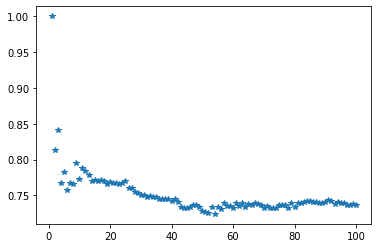

In [ ]:
plt.plot(k, allAccuracyT, '*')

## Part 3: Feature Selection
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and:
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features.

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.

* State what is the number of essential features for classification and justify your answer.
  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
from sklearn import tree

def Feature_selector (X_train , y_train , tr=0.95):

  dfFunction = pd.DataFrame.from_records(data = X_train)
  dfForFullFeature = pd.DataFrame.from_records(data = X_train)

  allAccuracyFunction = np.array([])
  removedFeaturesList = np.array([])
  allNumberK = np.array([])
  featuresNumbersList = list()


  featuresNumbers = X_train.shape[1]

  stopLoop = 0
  while(stopLoop == 0):
    currentAccuracy = np.array([])
    currentScores = np.array([])

    print(featuresNumbers)
    dt = tree.DecisionTreeClassifier()
    dt.fit(dfFunction,y_train)
    importance = dt.feature_importances_

    minorImportant = np.min(importance)
    minorIndex = np.argwhere(importance == minorImportant)
    minorIndex1 = int(minorIndex[0])

    removedFeaturesList = np.append(removedFeaturesList, dfFunction[minorIndex1])
    dfFunction.drop(minorIndex1, inplace=True, axis=1)
    dfFunction.columns = range(dfFunction.columns.size)
    featuresNumbers = featuresNumbers - 1

    kFunction = list(range(1,101))
    for e in range(1,101):
      currentKnn = neighbors.KNeighborsClassifier(n_neighbors = e)
      currentScores = cross_validate(currentKnn, dfFunction, y_train, cv=5, return_train_score=True)
      currentAccuracy = np.append(currentAccuracy,currentScores['test_score'].mean())

    bestAccuracyFunction = np.max(currentAccuracy)
    bestIndexFunction = np.argwhere(currentAccuracy == bestAccuracyFunction)
    bestIndexFunction = int(bestIndexFunction[0])
    bestkFunction = kFunction[bestIndexFunction]
    allAccuracyFunction = np.append(allAccuracyFunction,bestAccuracyFunction)
    allNumberK = np.append(allNumberK,bestkFunction)


    if featuresNumbers == 1:
      stopLoop = 1
      featuresNumbersList = list(range(featuresNumbers,X_train.shape[1]))

    KnnForFullFeature = neighbors.KNeighborsClassifier(n_neighbors = bestkFunction)
    currentScoresForFullFeature = cross_validate(KnnForFullFeature, dfForFullFeature, y_train, cv=5, return_train_score=True)
    accuracyForFullFeature = currentScoresForFullFeature['test_score'].mean()
    if bestAccuracyFunction < tr*accuracyForFullFeature:
      stopLoop = 1
      featuresNumbersList = list(range(featuresNumbers,X_train.shape[1]))


  return allAccuracyFunction,allNumberK,featuresNumbersList,removedFeaturesList

10
9
8
7
6
5
4
3
2
[0.74769963 0.7539926  0.7575357  0.75742993 0.75404548 0.76377578
 0.75409836 0.72485457 0.72480169]
[24. 91.  7. 73.  7. 19. 60. 82. 85.]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


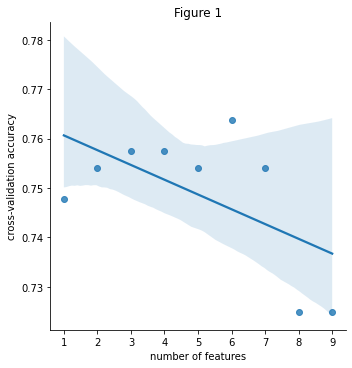

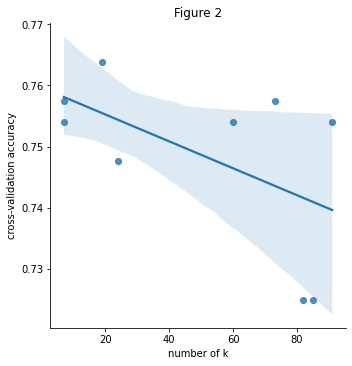

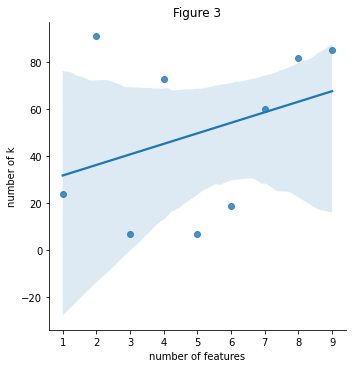

In [ ]:
allAccuracyFunction0, allNumberK0, featuresNumbersList0, removedFeaturesList0 = Feature_selector(X_train,y_train,tr=0.95)
print(allAccuracyFunction0)
print(allNumberK0)
print(featuresNumbersList0)

fig1 = pd.DataFrame({'number of features': featuresNumbersList0,'cross-validation accuracy': allAccuracyFunction0})
sns.lmplot(data=fig1, x="number of features", y="cross-validation accuracy").set(title='Figure 1')

fig1 = pd.DataFrame({'number of k': allNumberK0,'cross-validation accuracy': allAccuracyFunction0})
sns.lmplot(data=fig1, x="number of k", y="cross-validation accuracy").set(title='Figure 2')

fig2 = pd.DataFrame({'number of features': featuresNumbersList0,'number of k': allNumberK0})
sns.lmplot(data=fig2, x="number of features", y="number of k").set(title='Figure 3')


## Part 4: Standardization

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.


10
9
8
7
6
5
4
3
2


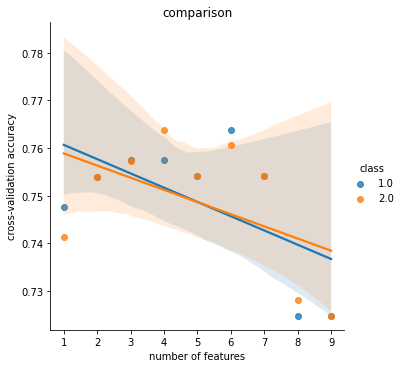

In [ ]:
### YOUR CODE HERE ###
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_scaledTest = scaler.transform(X_test)

aList, kList, fList, rList = Feature_selector(X_scaled,y_train,tr=0.95)
class1 = pd.DataFrame({'number of features': featuresNumbersList0,'cross-validation accuracy': allAccuracyFunction0})
class2 = pd.DataFrame({'number of features': fList,'cross-validation accuracy': aList})
class1['class'] = np.ones((len(allAccuracyFunction0),1))
class2['class'] = np.ones((len(aList),1))*2
allClass = pd.concat([class1, class2])

sns.lmplot(data=allClass, x="number of features", y="cross-validation accuracy", hue="class").set(title='comparison')

## Part 5: Decision Tree Classifier

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.


In [ ]:
### YOUR CODE HERE ###
from sklearn.tree import DecisionTreeClassifier
max_depthList = np.array([])
min_samples_splitList = np.array([])
allDecisionTreeAccuracyPart5 = np.array([])
for g in range(1,101):
  for h in range(2,101):
    clf = DecisionTreeClassifier(random_state=0, max_depth=g, min_samples_split=h)
    decisionTreeScores = cross_validate(clf, X_scaled, y_train, cv=5, return_train_score=True)
    allDecisionTreeAccuracyPart5 = np.append(allDecisionTreeAccuracyPart5,decisionTreeScores['test_score'].mean())
    max_depthList = np.append(max_depthList,g)
    min_samples_splitList = np.append(min_samples_splitList,h)

bestDecisionTreeAccuracyPart5 = np.max(allDecisionTreeAccuracyPart5)
bestIndexDTPart5 = np.argwhere(allDecisionTreeAccuracyPart5 == bestDecisionTreeAccuracyPart5)
bestIndexDTPart5 = int(bestIndexDTPart5[0])
bestmax_depth = max_depthList[bestIndexDTPart5]
bestmin_samples_split = min_samples_splitList[bestIndexDTPart5]
print("Best accuracy of Decision Tree mode:",bestDecisionTreeAccuracyPart5)
print("Best depth of Decision Tree mode:",bestmax_depth)
print("Best min_samples_split of Decision Tree mode:",bestmin_samples_split)

allKnnAccuracyPart5 = np.array([])
for i in range(1,101):
  knnPart5 = neighbors.KNeighborsClassifier(n_neighbors = i)
  knnPart5Scores = cross_validate(knnPart5, X_scaled, y_train, cv=5, return_train_score=True)
  allKnnAccuracyPart5 = np.append(allKnnAccuracyPart5,knnPart5Scores['test_score'].mean())

bestKnnAccuracyPart5 = np.max(allKnnAccuracyPart5)
bestIndexKNNPart5 = np.argwhere(allKnnAccuracyPart5 == bestKnnAccuracyPart5)
bestIndexKNNPart5 = int(bestIndexKNNPart5[0])
print("Best accuracy of Knn mode:",bestKnnAccuracyPart5)
print("Best k of Knn mode:",bestIndexKNNPart5)



Best accuracy of Decision Tree mode: 0.7474352194606029
Best depth of Decision Tree mode: 5.0
Best min_samples_split of Decision Tree mode: 71.0
Best accuracy of Knn mode: 0.754151242728715
Best k of Knn mode: 12


## Part 6: Test Data

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside.


In [ ]:
### YOUR CODE HERE ###
knnPart5 = neighbors.KNeighborsClassifier(n_neighbors = 12)
knnPart6Scores = cross_validate(knnPart5, X_scaledTest, y_test, cv=5, return_train_score=True)
KnnAccuracyPart6 = knnPart5Scores['test_score'].mean()
print("CV accuracy of test data in Knn mode:",KnnAccuracyPart6)

CV accuracy of test data in Knn mode: 0.7314119513484928
